# College Admissions EDA

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

## Data Import and Overview

In [3]:
df = pd.read_csv('./data/College.csv')

In [4]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    object 
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [6]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
df.describe(include='O')

,Unnamed: 0,Private,PhD
count,777,777,777
unique,777,2,78
top,Abilene Christian University,Yes,?
freq,1,565,29


In [8]:
df.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

## Data Cleaning

We are not missing any data, but our column names are not great and PhD should be a percentage (number). but it is an object. 

### Rename Column Names

In [9]:
df.rename(columns={'Unnamed: 0': 'University'}, inplace=True)

In [10]:
df.columns = df.columns.str.replace('.', '_').str.lower()

In [11]:
df.head()

,university,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Fix PhD

In [12]:
df['phd'].value_counts()

phd
?     29
77    26
73    24
90    22
71    21
      ..
34     1
31     1
41     1
22     1
16     1
Name: count, Length: 78, dtype: int64

We have a question mark in our PhD column, so that should be replaced with a NaN value and the column to numerical. 

In [13]:
df['phd'] = pd.to_numeric(df['phd'], errors='coerce')

In [14]:
df.dtypes

university      object
private         object
apps             int64
accept           int64
enroll           int64
top10perc        int64
top25perc        int64
f_undergrad      int64
p_undergrad      int64
outstate         int64
room_board       int64
books            int64
personal         int64
phd            float64
terminal         int64
s_f_ratio      float64
perc_alumni      int64
expend           int64
grad_rate        int64
dtype: object

Now PhD is an integer, but it has null values now

In [15]:
df.isna().sum()

university      0
private         0
apps            0
accept          0
enroll          0
top10perc       0
top25perc       0
f_undergrad     0
p_undergrad     0
outstate        0
room_board      0
books           0
personal        0
phd            29
terminal        0
s_f_ratio       0
perc_alumni     0
expend          0
grad_rate       0
dtype: int64

As there are not many missing values, we will just drop the rows that have NaN values. 

In [16]:
df = df.dropna()

In [17]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,2971.072193,2000.812834,774.645722,27.477273,55.762032,3684.203209,856.808824,10414.467914,4359.664439,549.352941,1340.082888,72.518717,79.613636,14.074332,22.839572,9601.622995,65.419786
std,3853.784286,2433.325215,925.818866,17.470289,19.667573,4860.286376,1538.225229,3990.415313,1099.291586,167.004079,679.581960,16.315199,14.629166,3.894483,12.345254,5125.989711,17.142141
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,300.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,760.500000,588.000000,239.000000,15.000000,41.000000,986.750000,95.000000,7257.000000,3595.750000,451.500000,850.000000,62.000000,70.750000,11.500000,13.000000,6755.500000,53.000000
50%,1543.500000,1108.000000,433.000000,23.000000,54.000000,1705.500000,350.500000,9937.500000,4194.500000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8354.500000,65.000000
75%,3581.500000,2394.500000,878.500000,35.000000,69.000000,3911.000000,967.250000,12859.500000,5064.000000,600.000000,1692.500000,85.000000,92.000000,16.425000,31.000000,10787.500000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.000000


Hmmm..., it looks like there might be some numbers that go over 100% for phd and grad_rate. Let's look closer. 

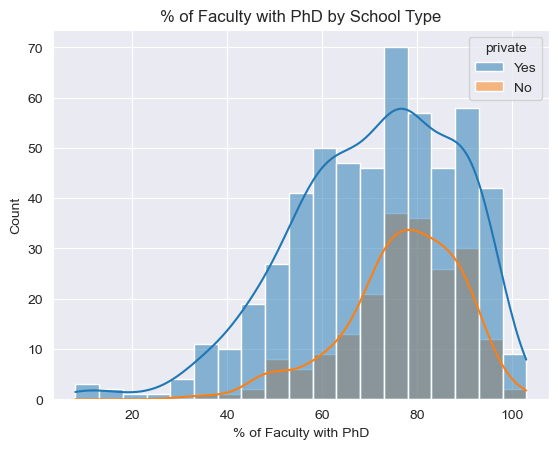

In [18]:
sns.histplot(data=df, x='phd', hue='private', kde=True)
plt.title("% of Faculty with PhD by School Type")
plt.xlabel("% of Faculty with PhD")
plt.savefig('./images/phd_before.png')

> This is the distribution of the percent of faculty with PhDs. There seems to be a normal bell curve for both Private and Public school.
>
> However, there seems to be at least one school that has over 100% faculty with PhD, which isn't possible. 

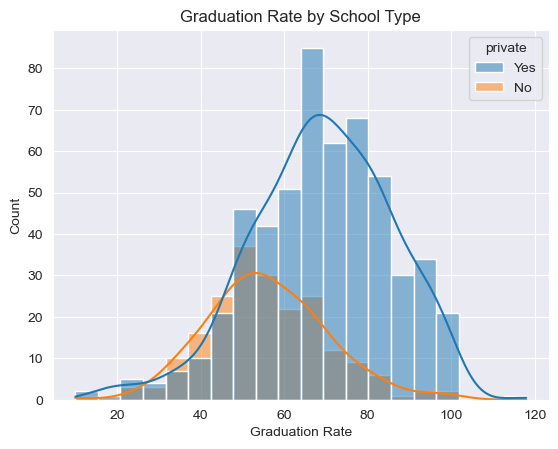

In [19]:
sns.histplot(data=df, x='grad_rate', hue='private', kde=True)
plt.title("Graduation Rate by School Type")
plt.xlabel("Graduation Rate")
plt.savefig('./images/grad_rate_before.png')

> This is the distribution of the Graduation Rate. This also seems to have a normal bell curve for both Private and Public school.
>
> However, there seems to be at least one school that has over 100% graduation rate, which also isn't possible. 

Looks like for both `phd` and `grad_rate`, the numbers go over 100, which shouldn't be possible. Let's filter those out. 

In [20]:
df_filterd = df[(df['phd'] <= 100) & (df['grad_rate'] <= 100)]

In [21]:
df.shape

(748, 19)

In [22]:
df_filterd.shape

(746, 19)

In [23]:
df = df_filterd

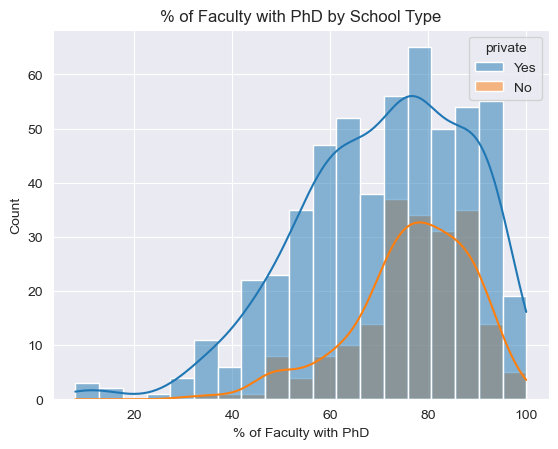

In [24]:
sns.histplot(data=df, x='phd', hue='private', kde=True)
plt.title("% of Faculty with PhD by School Type")
plt.xlabel("% of Faculty with PhD")
plt.savefig('./images/phd_after.png')

> After removing the outlier, we see that the curve is actually more left skewed then normal distriubtion. 

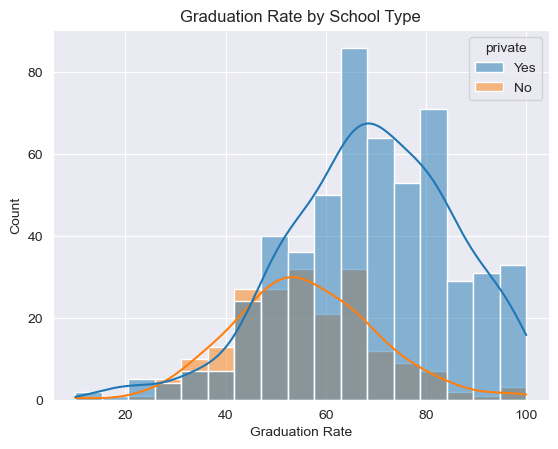

In [25]:
sns.histplot(data=df, x='grad_rate', hue='private', kde=True)
plt.title("Graduation Rate by School Type")
plt.xlabel("Graduation Rate")
plt.savefig('./images/grad_rate_after.png')

> After removing the outliers, the histogram retains the normal distrbution it seems, though it is slightly to the right for private schools.

## Feature Engineering 

Let's add some new columns to our data set. 

In [26]:
df['reject'] = df['apps'] - df['accept']
# number of applications rejected (all application - applications accepted)

In [27]:
df['perc_accept'] = ((df['accept'] / df['apps']) * 100).round(2)
# percent of applications accepted

In [28]:
df['perc_actually_came'] = ((df['enroll'] / df['accept']) * 100).round(2)
# percent of students that actually came to the school after being accepted. 

In [29]:
df.head()

,university,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,...,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate,reject,perc_accept,perc_actually_came
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,2200,70.0,78,18.1,12,7041,60,428,74.22,58.52
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,1500,29.0,30,12.2,16,10527,56,262,88.01,26.61
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,1165,53.0,66,12.9,30,8735,54,331,76.82,30.63
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,...,875,92.0,97,7.7,37,19016,59,68,83.69,39.26
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,...,1500,76.0,72,11.9,2,10922,15,47,75.65,37.67


In [30]:
# df.to_csv('./data/cleaned_college.csv', index=False)

## Exploratory Data Analysis

### Questions

- What is the difference in graduation rate by school type?
- What is the acceptance rate for each school type?
- On average, what percent of students actually enroll to the school they were accepted to?
- What is the relationship between applications recieved and room and boared costs?
- What is the relationship between the percent accepted and the percent that enrolled?

### What is the difference in graduation rate by school type?

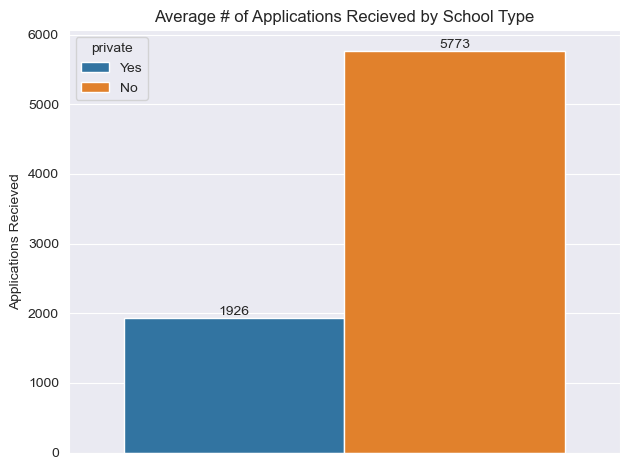

In [31]:
ax = sns.barplot(data=df, y='apps', hue='private', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.title("Average # of Applications Recieved by School Type")
plt.ylabel("Applications Recieved")
plt.tight_layout()
plt.savefig("./images/apps_school.png")

> We see that, on average, public school recieve more applications than private schools. 

### What is the acceptance rate for each school type?

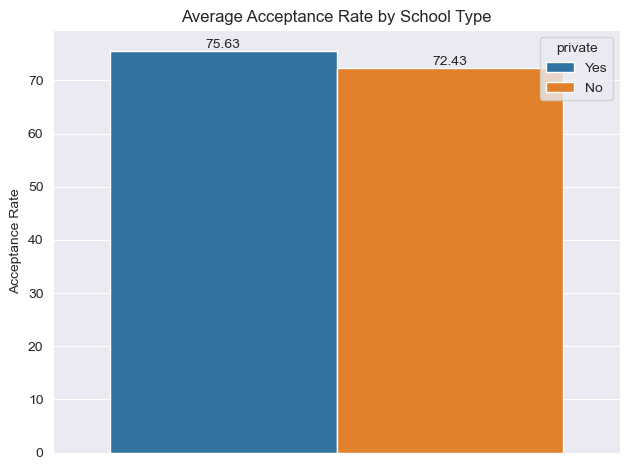

In [42]:
ax = sns.barplot(data=df, y='perc_accept', hue='private', errorbar=None)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')


plt.title("Average Acceptance Rate by School Type")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig("./images/accept_school.png")


> The above barplot shows the average acceptance rate of public and private schools. The acceptance rates for both are very close, but private schools have a higher average acceptance rate. 

### On average, what percent of students actually enroll to the school they were accepted to?

In [33]:
go = df['perc_actually_came']
dont_go = 100 - go

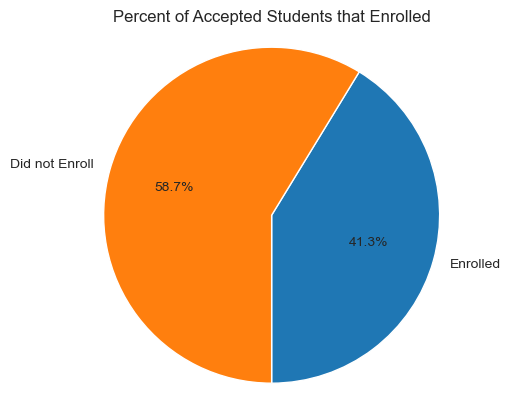

In [34]:
plt.pie([go.mean(), dont_go.mean()], labels=['Enrolled', 'Did not Enroll'], autopct='%1.1f%%', startangle=270)
plt.axis('equal');
plt.title("Percent of Accepted Students that Enrolled")
plt.savefig("./images/accept_enroll.png")

> The above pie chart show what percent of students who were accepted actually enrolled to the school. We see that most students do not enroll in the school they were accepted at. This would make sense, as students probably apply, and get accepted to, multiple school, but can only attend one. 

### What is the relationship between applications recieved and room and board costs?

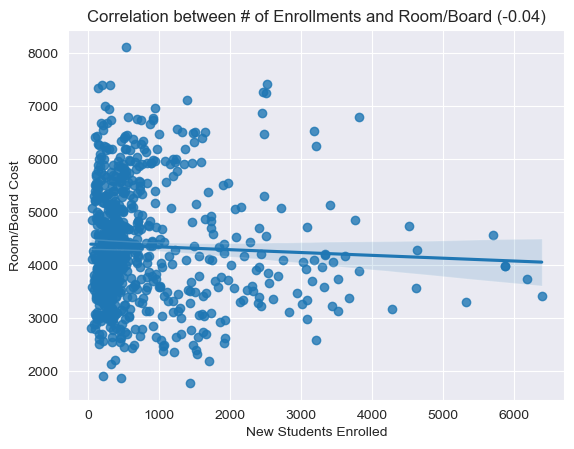

In [40]:
sns.regplot(data=df, x='enroll', y='room_board')
plt.title("Correlation between # of Enrollments and Room/Board (-0.04)")
plt.xlabel("New Students Enrolled")
plt.ylabel("Room/Board Cost")
plt.savefig("./images/enroll_roomboard.png")

> The above regression plot shows the relationship between new students enrolled and the room/board cost. There is essentially no correlation between them. 

### What is the relationship between the number of apps accepted and the number that enrolled?

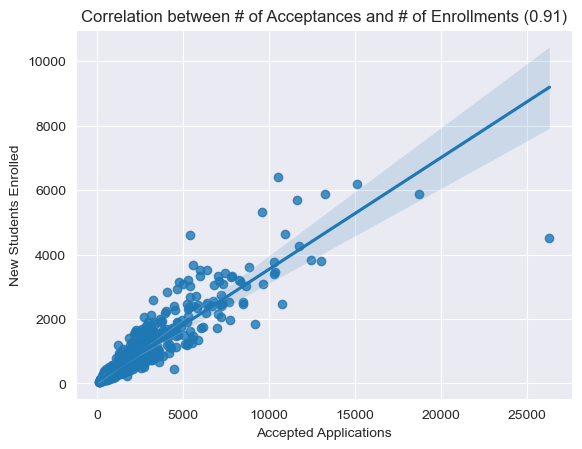

In [38]:
sns.regplot(data=df, x='accept', y='enroll')
plt.title("Correlation between # of Acceptances and # of Enrollments (0.91)")
plt.xlabel("Accepted Applications")
plt.ylabel("New Students Enrolled")
plt.savefig("./images/accept_enroll_corr.png")

> The above regression plot shows the correlation between the number of accepted students and the number of enrolled students. Obviously it makes sense that as the number of students accepted goes up, so does the number of enrollments. 